In [45]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [46]:
df = pd.read_csv('/content/titanic_train.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,"England New York, NY"


199


<Axes: ylabel='Count'>

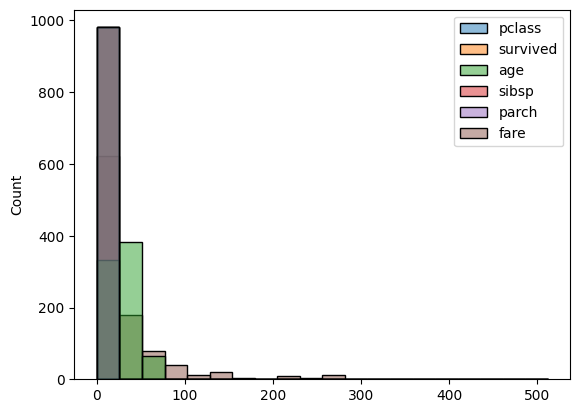

In [47]:
# Количество пропущенных значений age
print(df['age'].isnull().sum())

# Гистограмма распределения по объектам классов
sns.histplot(df, bins = 20)


In [48]:
col_to_drop = ['ticket', 'sibsp', 'parch']
for i in range(df.shape[1]):
  a = df.iloc[:,i].isnull().sum()
  if a > df.shape[0] / 3:
    col_to_drop.append(df.columns[i])
df['fam_size'] = df['sibsp'] + df['parch']
df.drop(columns=col_to_drop, inplace = True)

df

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


(array([25.,  8.,  7., 16., 33., 48., 31., 35., 33., 16., 12., 20., 12.,
        11.,  5.,  4.,  0.,  0.,  1.,  1.]),
 array([ 0.4167  ,  4.395865,  8.37503 , 12.354195, 16.33336 , 20.312525,
        24.29169 , 28.270855, 32.25002 , 36.229185, 40.20835 , 44.187515,
        48.16668 , 52.145845, 56.12501 , 60.104175, 64.08334 , 68.062505,
        72.04167 , 76.020835, 80.      ]),
 <BarContainer object of 20 artists>)

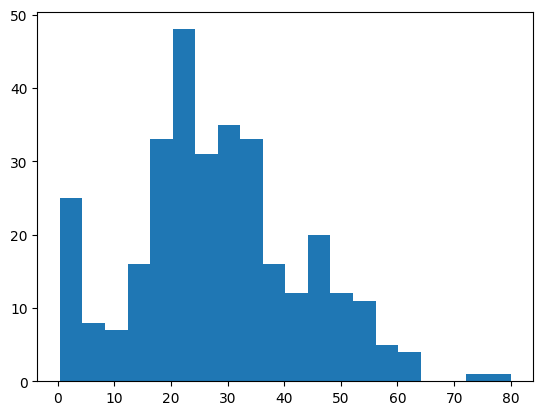

In [67]:
# Вероятность выжить если пассажир male, pclass == 3
(df[(df['sex'] == 'male') & (df['pclass'] == 3)]['survived']==1).sum() / df[(df['sex'] == 'male') & (df['pclass'] == 3)]['survived'].count()
# Гистограмма выживших по возрастам
plt.hist(df[df['survived']==1]['age'], bins = 20)

In [ ]:
random_state=21